In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
xi = np.linspace(-2, 2, 200)

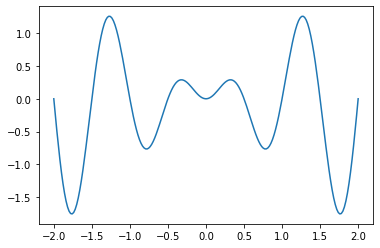

In [30]:
plt.plot(xi, xi*np.sin(2*np.pi*xi))

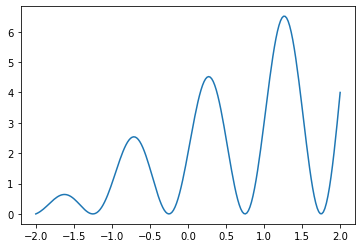

In [31]:
plt.plot(xi, (xi-xi.min())*(1+np.sin(2*np.pi*xi)))

x < y < z
(x < y) and (y < z)

In [17]:
-2 < 2 > 1

True

In [16]:
-4 < -2 < 1 < 2 < 4 < 10

True

In [12]:
energy = lambda x: (x+2)*(1+np.sin(2*np.pi*x)) if -2 < x < 2 else 10000000

In [33]:
(xi < -2) * 1e5

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [37]:
energy = lambda x: ((x < -2) | (x > 2))*1e3 + (x+2)*(1+np.sin(2*np.pi*x))

In [145]:
energy = lambda x: ((x < -2) | (x > 2))*1e3 + x*np.sin(2*np.pi*x)

In [144]:
energy(0.0)

0.0

In [90]:
n = 1000
kBT = 2
step = 1e-1

In [91]:
from itertools import count

In [92]:
x0 = 0
E0 = energy(x0)
xs = [x0]
Es = [E0]
for i in count():
    dx = 2*step*(np.random.rand() -.5)
    x = xs[-1] + dx
    E = energy(x)
    if np.random.rand() < np.exp(-(E-Es[-1])/kBT):
        xs.append(x)
        Es.append(E)
    if len(xs) >= n:
        break
xs = np.array(xs)
Es = np.array(Es)
print('Acceptance', n/i)

Acceptance 0.9017132551848512


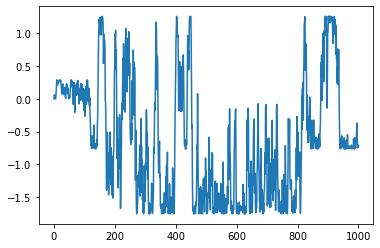

In [93]:
plt.plot(Es)

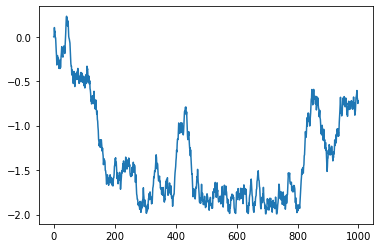

In [94]:
plt.plot(xs)

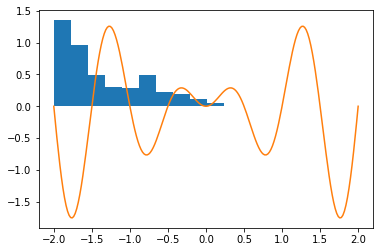

In [95]:
plt.hist(xs, density=True)
plt.plot(xi, energy(xi))

In [80]:
def mc_step(xs, Es, kBT, step=step, energy=energy):
    dx = 2*step*(np.random.rand() -.5)
    x = xs[-1] + dx
    E = energy(x)
    if np.random.rand() < np.exp(-(E-Es[-1])/kBT):
        xs.append(x)
        Es.append(E)

In [81]:
x0 = 0
E0 = energy(x0)
xs = [x0]
Es = [E0]
for i in count():
    mc_step(xs, Es, kBT)
    if len(xs) >= n:
        break
xs = np.array(xs)
Es = np.array(Es)
print('Acceptance', n/i)

Acceptance 0.8506294658046955


In [86]:
def mc_run(xs, Es, kBT, steps, step=step, energy=energy):
    E0 = energy(x0)
    for i in range(steps):
        mc_step(xs, Es, kBT, step=step, energy=energy)
    xs = np.array(xs)
    Es = np.array(Es)
    return xs, Es

In [87]:
xs = [x0]
Es = [E0]
xs, Es = mc_run(xs, Es, .05, 10000)

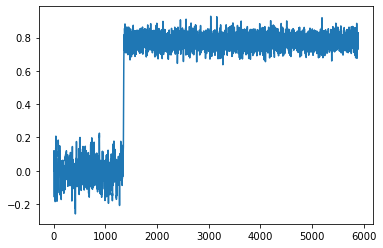

In [88]:
plt.plot(xs)

In [216]:
kBTs = [0.05, .3, .7, 1, 2]

In [217]:
import random

In [218]:
random.choice(list(zip(kBTs[:-1], kBTs[1:])))

(1, 2)

In [219]:
from tqdm.auto import tqdm

In [220]:
M = 100
n = 10000
x0 = 0.0
xs = {kBT: [x0] for kBT in kBTs}
Es = {kBT: [energy(xs[kBT][-1])] for kBT in kBTs}

for i in tqdm(range(M)):
    for kBT in kBTs:
        mc_run(xs[kBT], Es[kBT], kBT, steps=n)
    kBTi, kBTj = random.choice(list(zip(kBTs[:-1], kBTs[1:])))
    xi = xs[kBTi][-1]
    xj = xs[kBTj][-1]
    Ei = Es[kBTi][-1]
    Ej = Es[kBTj][-1]
    if np.random.rand() < np.exp((1/kBTi - 1/kBTj) * (Ei - Ej)):
        #if kBTi == kBTs[1]: print('!!!', kBTi, kBTj, xi, xj, Ei, Ej)
        xs[kBTi].append(xj)
        xs[kBTj].append(xi)
        Es[kBTi].append(Ej)
        Es[kBTj].append(Ei)
    else:
        #if kBTi == kBTs[1]: print('xxx', kBTi, kBTj, xi, xj, Ei, Ej)
        pass

  0%|          | 0/100 [00:00<?, ?it/s]

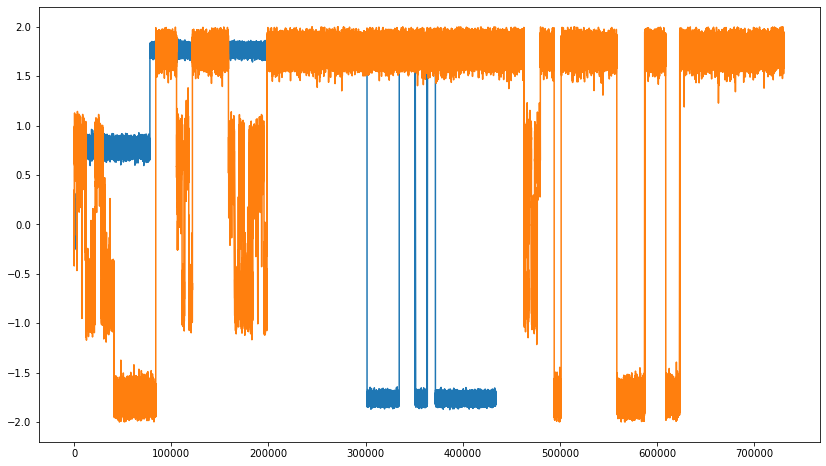

In [224]:
plt.plot(xs[0.05])
plt.plot(xs[0.3])

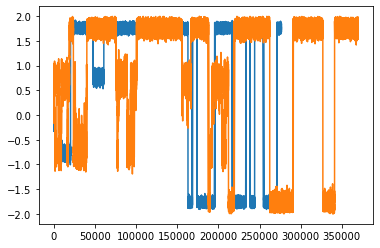

In [169]:
plt.plot(xs[0.1])
plt.plot(xs[0.3])

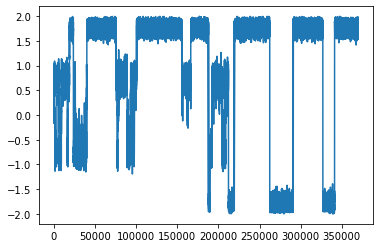

In [170]:
plt.plot(xs[0.3])

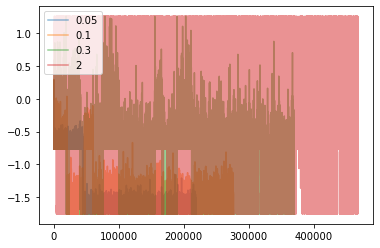

In [171]:
for k in kBTs:
    plt.plot(Es[k], label=k, alpha=.5)
plt.legend()

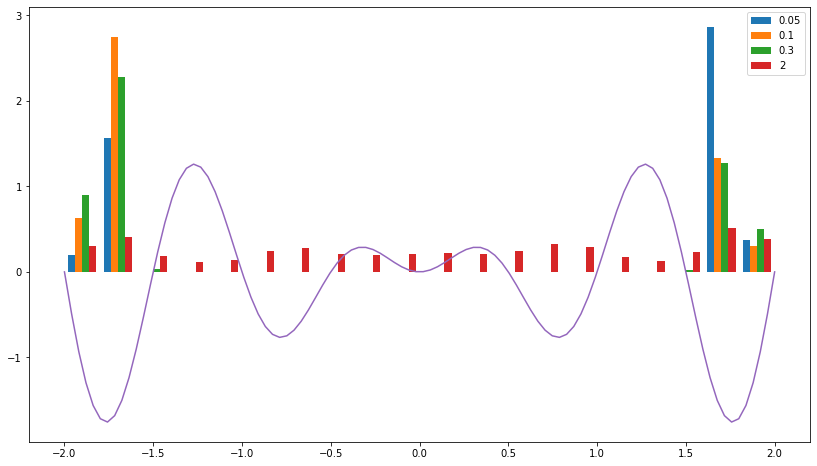

In [202]:
xx = np.linspace(-2, 2, 100)
plt.hist([xs[k][len(xs[k])//2:] for k in kBTs], label=kBTs, density=True, bins=20)
plt.plot(xx, energy(xx))
plt.legend()

In [194]:
def boltzmann(x, kBT, energy=energy):
    p = np.exp(-energy(x)/kBT)
    p /= np.trapz(p, x)
    return p

In [195]:
xx = np.linspace(-2, 2, 100)

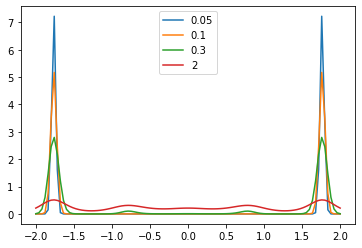

In [196]:
for k in kBTs:
    plt.plot(xx, boltzmann(xx, k), label=k)
plt.legend()

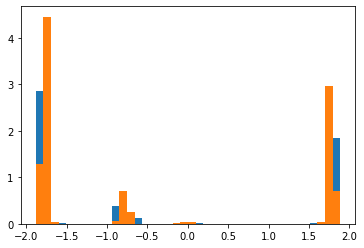

In [197]:
plt.hist(xs[0.05], label=kBTs, density=True, bins=20);
plt.hist(xs[0.05], label=kBTs, density=True, bins=40);

In [199]:
plt.rc('figure', figsize=(14,8))

In [206]:
from scipy.stats import gaussian_kde

In [208]:
gaussian_kde(xx)

(1e-10, 10.0)

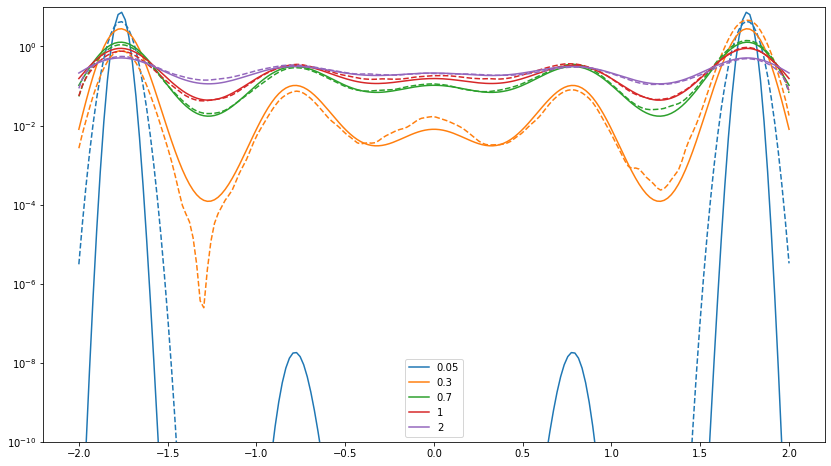

In [226]:
xx = np.linspace(-2, 2, 200)
for k in kBTs:
    l, = plt.plot(xx, gaussian_kde(xs[k][len(xs[k])//2:], bw_method=.02)(xx), '--')
    plt.plot(xx, boltzmann(xx, k), label=k, color=l.get_color())
plt.gca().set_yscale('log')
plt.legend()
plt.ylim(1e-10,1e1)